In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install summarytools
!pip install skimpy

**Data Processing**

In [ ]:
#Loading Customer Dataset
df= pd.read_excel('/content/customer.xlsx')

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.head

<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]>

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,InvoiceNo[object],1. 5735852. 5812193. 5814924. 5807295. 5584756. 5797777. 5812178. 5374349. 58073010. 53807111. other,"1,114 (0.2%)749 (0.1%)731 (0.1%)721 (0.1%)705 (0.1%)687 (0.1%)676 (0.1%)675 (0.1%)662 (0.1%)652 (0.1%)534,537 (98.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADXElEQVR4nO3cwWkbYRRG0TdGOPZGQhhcQtKDi0ixKUJFpAdjPIvY8WaySBYpINwB5ZwK/sWFh2A+Ldu2DRRu9n4A/w+xkREbGbGRERsZsZERGxmxkREbGbGRuVmW5cuyLHd7P4TrdzMzn2fm094P4fo5o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5mZmvs/Mz70fwvVb/IsRFWeUjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiMjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyy8zcz8zt3g/hqn1s2/Z2eHh4+Ho8Hs97v4brta7ry7Is3w7H4/H89PT0djqd3vd+FNfn9fX17nK5nJ+fn28PMzOn0+n98fHxx94P42rdz/iBQEhsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERuYw8/szkL0fwnX6u63Duq4vl8vlPH8+A4F/bV3Xl5n58Fk4hY9t296sq8j4gUBGbGTERkZsZMRGRmxkxEZGbGTERuYXwgdpOf758ysAAAAASUVORK5CYII="">",0(0.0%)
2,StockCode[object],1. 85123A2. 224233. 85099B4. 475665. 207256. 848797. 227208. 221979. 2121210. 2072711. other,"2,313 (0.4%)2,203 (0.4%)2,159 (0.4%)1,727 (0.3%)1,639 (0.3%)1,502 (0.3%)1,477 (0.3%)1,476 (0.3%)1,385 (0.3%)1,350 (0.2%)524,678 (96.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADoElEQVR4nO3cQWojVxhG0b+McNqTEkLgJSR78CJ6sb0ILSJ7MMY1iDueKIMEYtKdSaBvgXLOyGj0Bhc9SdTn5Xq9DhTu9j4A/x9iIyM2MmIjIzYyYiMjNjJiIyM2MsvMPMzMXK/Xt53Pwo07nM/nzzMzy7J8ERw/0t26rqd1XU8zc7/3YbhtPrORERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5nDtm0vf/39vutJuHk2CGQW/zKLinc2MtZVZKyryPjpg4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGY+FkzF4IeOdjYzBCxmDFzJ++iAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsZj4WQMXsj4zEZGbGTulmX5ZVmWT3sfhNt3NzM/z8xPex+E2+caJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjczczv87M73sfhNtn8ELGNUpGbGQMXsgYvJBxjZIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsY1SkZsZAxeyBi8kHGNkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVkXKNkxEbGuoqMdRUZ1ygZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzIGL2Rco2TERsbghYzBCxnXKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZFyjZMRGRmxkrKvIWFeRcY2SERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGNUpGbGQMXsgYvJBxjZIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsY1SmaZmYeZud/7INyc9+v1+vbxhcP5fP68rutprxNxm7Zte1mW5cvH4A7rup6enp7ejsfj1z0Px+14fX39dLlcTs/Pz/cz83dsMzPH4/Hr4+Pjb7udjlv08M8XfEEgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5j585GQvQ/C7fi3ng7btr1cLpfTfOeREPivtm17mZn3j695LJwf5ZvHwq2ryPiCQEZsZMRGRmxkxEZGbGTERkZsZMRG5g//Y5666t8WrwAAAABJRU5ErkJggg=="">",0(0.0%)
3,Description[object],1. WHITE HANGING HEART T-LIGHT HO2. REGENCY CAKESTAND 3 TIER3. JUMBO BAG RED RETROSPOT4. PARTY BUNTING5. LUNCH BAG RED RETROSPOT6. ASSORTED COLOUR BIRD ORNAMENT7. SET OF 3 CAKE TINS PANTRY DESI8. nan9. PACK OF 72 RETROSPOT CAKE CASE10. LUNCH BAG BLACK SKULL.11. other,"2,369 (0.4%)2,200 (0.4%)2,159 (0.4%)1,727 (0.3%)1,638 (0.3%)1,501 (0.3%)1,473 (0.3%)1,454 (0.3%)1,385 (0.3%)1,350 (0.2%)524,653 (96.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwga

In [ ]:
#Remove duplicate rows
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


In [ ]:
#Use stockcode to determine the Destription
df['Description'] = df['Description'].fillna(df.groupby('StockCode')['Description'].transform('first'))
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

/tmp/ipykernel_2521/423014228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'] = df['Description'].fillna(df.groupby('StockCode')['Description'].transform('first'))


In [ ]:
def fill_description(row):
    if pd.isna(row['Description']):
        return f"Stocks with code {row['StockCode']}"
    else:
        return row['Description']

#Use stockcode to replace the empty description
df['Description'] = df.apply(fill_description, axis=1)


/tmp/ipykernel_2521/3265120692.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'] = df.apply(fill_description, axis=1)


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


In [ ]:
#Remove rows containing empty CustomerID and Description
df = df.dropna()
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [ ]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 401604 │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 6      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0       ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Quantity       │   0 │      0 │   12.18 │   250.3 │   -81000 │      2 │      5 │     12 │  81000 │     ▇   │  │
│ │ UnitPrice      │   0 │      0 │   3.474 │   69.76 │        0 │   1.25 │   1.95 │   3.75 │  38970 │    ▇    │  │
│ │ CustomerID     │   0 │      0 │   15280 │    1714 │    12350 │  13940 │  15140 │  16780 │  18290 │ ▇▆▇▆▆▇  │  │
│ └────────────────┴─────┴────────┴─────────┴─────────┴──────────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %    ┃ first                      ┃ last                       ┃ frequency    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩  │
│ │ InvoiceDate      │    0 │       0 │    2010-12-01 08:26:00     │    2011-12-09 12:50:00     │ None         │  │
│ └──────────────────┴──────┴─────────┴────────────────────────────┴────────────────────────────┴──────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Description               │       0 │          0 │                          4.6 │                  1866687 │  │
│ │ Country                   │       0 │          0 │                          1.9 │                   759326 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
#Save the processed dataset
df.to_csv('ProcessedData.csv', index=False)

**Sales Trend Analysis-Time Based Trends**

In [ ]:
# Convert the 'InvoiceDate' column to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract year, month, and day
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['month_year'] = df['InvoiceDate'].dt.to_period('M')
df['day_of_week'] = df['InvoiceDate'].dt.dayofweek
df['day_month_combination'] = df['day_of_week'].astype(str) + '-' + df['month'].astype(str)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,month_year,day_of_week,day_month_combination
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,2010-12,2,2-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2010-12,2,2-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,2010-12,2,2-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2010-12,2,2-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2010-12,2,2-12


In [ ]:
# Extract unique year, month, day, day of week
unique_years = df['year'].unique()
unique_months = df['month'].unique()
unique_days = df['day'].unique()
unique_days_of_week = df['day_of_week'].unique()


print("Unique Years:", unique_years)
print("Unique Months:", unique_months)
print("Unique Days:", unique_days)
print("Unique Days of Week:", unique_days_of_week)

Unique Years: [2010 2011]
Unique Months: [12  1  2  3  4  5  6  7  8  9 10 11]
Unique Days: [ 1  2  3  5  6  7  8  9 10 12 13 14 15 16 17 19 20 21 22 23  4 11 18 24
 25 26 27 28 30 31 29]
Unique Days of Week: [2 3 4 6 0 1]


In [ ]:
# Group sales by month and year
monthly_sales = df.groupby(['month_year'])['Quantity'].sum()
print(monthly_sales)

month_year
2010-12    295177
2011-01    268755
2011-02    262243
2011-03    343095
2011-04    277730
2011-05    367115
2011-06    356239
2011-07    361359
2011-08    385865
2011-09    536350
2011-10    568898
2011-11    666813
2011-12    203212
Freq: M, Name: Quantity, dtype: int64


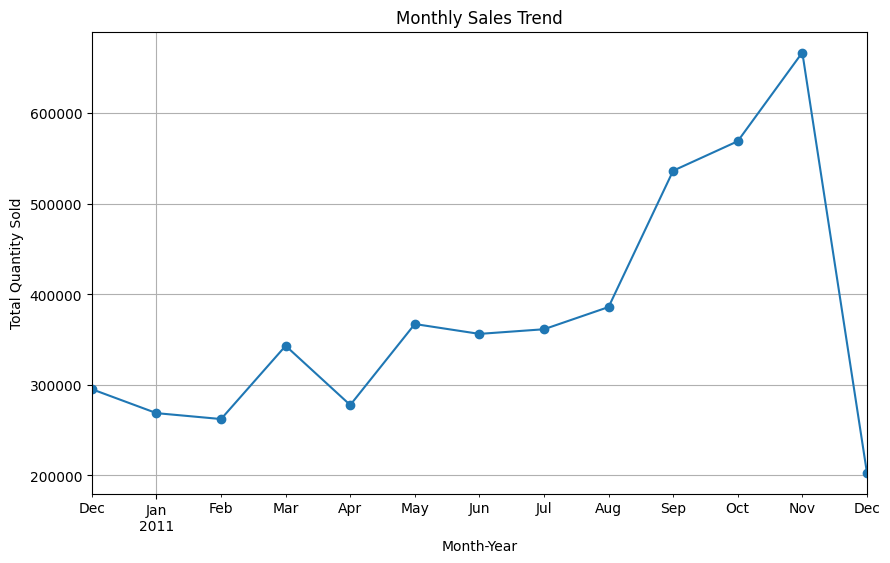

In [ ]:
# monthly sales trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

In [ ]:
# Filter data for August to November
sales_aug_nov = df[(df['month'] >= 8) & (df['month'] <= 11)]

# Group by product and sum quantities
top_products = sales_aug_nov.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(20)

# Create a DataFrame for better formatting
top_products_df = pd.DataFrame({'Product': top_products.index, 'Total Quantity Sold': top_products.values})


# Display the table with aligned headings
from IPython.display import display, HTML

display(HTML(top_products_df.to_html(index=False)))

Product,Total Quantity Sold
POPCORN HOLDER,22509
RABBIT NIGHT LIGHT,20441
JUMBO BAG RED RETROSPOT,19321
WORLD WAR 2 GLIDERS ASSTD DESIGNS,18296
ASSORTED COLOUR BIRD ORNAMENT,17194
ASSTD DESIGN 3D PAPER STICKERS,12632
60 CAKE CASES VINTAGE CHRISTMAS,11423
PAPER CHAIN KIT 50'S CHRISTMAS,11288
RED HARMONICA IN BOX,11155
WHITE HANGING HEART T-LIGHT HOLDER,10950


In [ ]:
# top 5 countries of sales from august till november and top 5 products

# Top 5 countries by sales quantity
top_countries = sales_aug_nov.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5)
print("Top 5 countries by sales quantity (August to November):")
print(top_countries)


# Top 5 products by sales quantity (already calculated in the provided code)
print("\nTop 5 products by sales quantity (August to November):")
print(top_products_df.head(5))

Top 5 countries by sales quantity (August to November):
Country
United Kingdom    1773199
Netherlands         92308
EIRE                60399
France              51142
Germany             51117
Name: Quantity, dtype: int64

Top 5 products by sales quantity (August to November):
                             Product  Total Quantity Sold
0                     POPCORN HOLDER                22509
1                 RABBIT NIGHT LIGHT                20441
2            JUMBO BAG RED RETROSPOT                19321
3  WORLD WAR 2 GLIDERS ASSTD DESIGNS                18296
4      ASSORTED COLOUR BIRD ORNAMENT                17194


In [ ]:
# least brought products from August to November

# Group by product and sum quantities
bottom_products = sales_aug_nov.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(10)

# Create a DataFrame for better formatting
bottom_products_df = pd.DataFrame({'Product': bottom_products.index, 'Total Quantity Sold': bottom_products.values})

# Display the table with aligned headings
display(HTML(bottom_products_df.to_html(index=False)))

Product,Total Quantity Sold
WHITE TALL PORCELAIN T-LIGHT HOLDER,-208
Discount,-36
VINTAGE BILLBOARD TEA MUG,-17
VINTAGE RED TEATIME MUG,-16
CRUK Commission,-15
PINK METAL CHICKEN HEART,-11
GLASS BEURRE DISH,-8
WHITE 3 FRAME BIRDS AND TREE,-1
BLUE EASTER EGG HUNT START POST,-1
YELLOW EASTER EGG HUNT START POST,-1


**Sales Trend Analysis-Geographic Trends**

In [ ]:
# Sales by country and sorted in descending order

# Group sales by country and sum quantities, then sort in descending order
sales_by_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Display the results
sales_by_country

,Quantity
Country,
United Kingdom,3994870
Netherlands,200128
EIRE,136187
Germany,117341
France,109806
Australia,83643
Sweden,35632
Switzerland,29778
Spain,26817


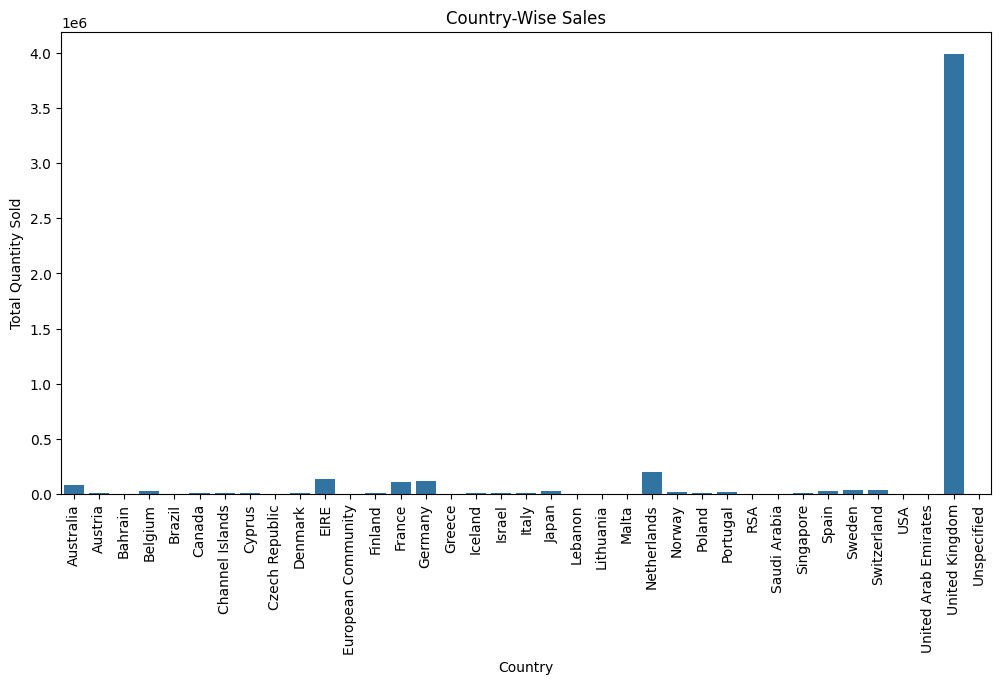

In [ ]:
# Group sales by country and sum the quantity
country_sales = df.groupby('Country')['Quantity'].sum()

# Plotting country-wise sales
plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.title('Country-Wise Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# integrate month region and sales table

sales_by_month_region = df.pivot_table(index='month_year', columns='Country', values='Quantity', aggfunc='sum')

# Display the resulting table
sales_by_month_region

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
month_year,,,,,,,,,,,,,,,,,,,,,
2010-12,444.0,3.0,NaN,1755.0,NaN,NaN,80.0,916.0,NaN,454.0,...,NaN,NaN,NaN,867.0,3714.0,714.0,NaN,NaN,251650.0,NaN
2011-01,5644.0,NaN,NaN,783.0,NaN,NaN,255.0,144.0,NaN,NaN,...,NaN,NaN,1091.0,3837.0,3096.0,2993.0,NaN,NaN,198357.0,NaN
2011-02,8659.0,342.0,NaN,1097.0,NaN,NaN,935.0,2190.0,346.0,224.0,...,NaN,80.0,NaN,866.0,250.0,1105.0,NaN,496.0,210946.0,NaN
2011-03,10329.0,982.0,NaN,1776.0,NaN,88.0,2104.0,1005.0,NaN,879.0,...,NaN,-5.0,NaN,2540.0,5263.0,986.0,NaN,NaN,271390.0,NaN
2011-04,117.0,311.0,NaN,1173.0,356.0,NaN,97.0,-4.0,-39.0,NaN,...,NaN,NaN,1384.0,953.0,310.0,778.0,137.0,NaN,247060.0,282.0
2011-05,9073.0,476.0,260.0,1825.0,NaN,504.0,221.0,NaN,NaN,368.0,...,NaN,NaN,NaN,1468.0,2829.0,2245.0,NaN,NaN,295390.0,654.0
2011-06,15973.0,-6.0,NaN,2244.0,NaN,1092.0,836.0,356.0,NaN,1544.0,...,NaN,NaN,NaN,1537.0,404.0,3965.0,NaN,NaN,273989.0,78.0
2011-07,5185.0,573.0,NaN,1678.0,NaN,1027.0,NaN,NaN,NaN,241.0,...,NaN,NaN,2160.0,3435.0,6006.0,1492.0,NaN,NaN,295929.0,586.0
2011-08,12570.0,790.0,NaN,2061.0,NaN,52.0,2002.0,NaN,NaN,329.0,...,NaN,NaN,NaN,1596.0,1303.0,2960.0,NaN,NaN,301208.0,185.0


In [ ]:
# Highest growth countries over months

# Calculate monthly growth rate for each country
monthly_growth = sales_by_month_region.pct_change()

# Find the countries with the highest average monthly growth rate
highest_growth_countries = monthly_growth.mean().sort_values(ascending=False).head(37)

print("Highest Growth Countries (Average Monthly Growth Rate):\n", highest_growth_countries)

Highest Growth Countries (Average Monthly Growth Rate):
 Country
Japan                   611.061981
Netherlands             243.255870
Australia                 7.435574
Italy                     7.135411
Sweden                    3.287162
Norway                    2.143399
Finland                   1.760869
Austria                   1.406076
Channel Islands           0.785140
Unspecified               0.783367
Denmark                   0.659959
Poland                    0.644888
European Community        0.547737
Canada                    0.542783
Portugal                  0.496154
Switzerland               0.465699
Spain                     0.439922
France                    0.316128
USA                       0.300462
EIRE                      0.295435
Germany                   0.110387
Iceland                   0.088693
Belgium                   0.057371
United Kingdom            0.027944
Singapore                 0.009688
RSA                       0.000000
Brazil                   

/tmp/ipykernel_2521/1156606366.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_growth = sales_by_month_region.pct_change()


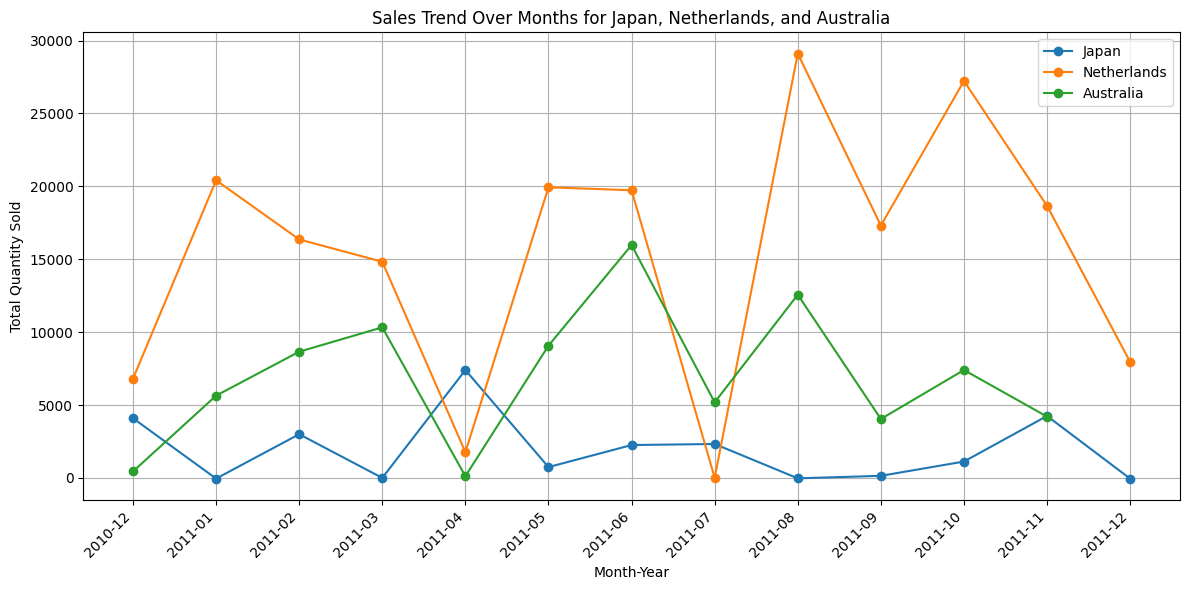

In [ ]:
# Sales trends over months for Japan,Netherland and Australia

# Select data for Japan, Netherlands, and Australia
countries = ['Japan', 'Netherlands', 'Australia']
sales_selected_countries = df[df['Country'].isin(countries)]

# Group by month and country, summing the quantity
sales_by_month_country = sales_selected_countries.groupby(['month_year', 'Country'])['Quantity'].sum().reset_index()


# Pivot the data for plotting
sales_pivot = sales_by_month_country.pivot(index='month_year', columns='Country', values='Quantity')


# Plotting
plt.figure(figsize=(12, 6))
for country in countries:
    plt.plot(sales_pivot.index.astype(str), sales_pivot[country], label=country, marker='o')

plt.xlabel('Month-Year')
plt.ylabel('Total Quantity Sold')
plt.title('Sales Trend Over Months for Japan, Netherlands, and Australia')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 20 highest selling products in Japan

# Filter for Japan
japan_sales = df[df['Country'] == 'Japan']

# Group by product and sum quantities for Japan
top_products_japan = japan_sales.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(20)

# Create a DataFrame for better formatting
top_products_japan_df = pd.DataFrame({'Product': top_products_japan.index, 'Total Quantity Sold': top_products_japan.values})

# Display the table with aligned headings
display(HTML(top_products_japan_df.to_html(index=False)))

Product,Total Quantity Sold
RABBIT NIGHT LIGHT,3401
PACK OF 12 TRADITIONAL CRAYONS,1201
ROUND SNACK BOXES SET OF 4 FRUITS,870
WORLD WAR 2 GLIDERS ASSTD DESIGNS,577
MINI PAINT SET VINTAGE,577
MAGIC DRAWING SLATE BAKE A CAKE,577
MAGIC DRAWING SLATE CIRCUS PARADE,577
MAGIC DRAWING SLATE PURDEY,577
MAGIC DRAWING SLATE SPACEBOY,577
SET 12 KIDS COLOUR CHALK STICKS,576


**Product Analysis-Top 10 Best Selling Products**

In [ ]:
# number of unique products
total_products = len(df['Description'].unique())
print(f"Total number of unique products: {total_products}")

Total number of unique products: 3896


In [ ]:
# Calculate total revenue for each product
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
product_revenue = df.groupby('Description')['TotalRevenue'].sum()

product_revenue

,TotalRevenue
Description,
4 PURPLE FLOCK DINNER CANDLES,265.66
50'S CHRISTMAS GIFT BAG LARGE,2269.75
DOLLY GIRL BEAKER,2745.75
I LOVE LONDON MINI BACKPACK,1449.85
I LOVE LONDON MINI RUCKSACK,4.15
...,...
ZINC T-LIGHT HOLDER STARS SMALL,3843.46
ZINC TOP 2 DOOR WOODEN SHELF,92.75
ZINC WILLIE WINKIE CANDLE STICK,2165.90



Top 10 Products by Quantity Sold:
 Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33386
POPCORN HOLDER                        30492
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25305
PACK OF 60 PINK PAISLEY CAKE CASES    24129
Name: Quantity, dtype: int64


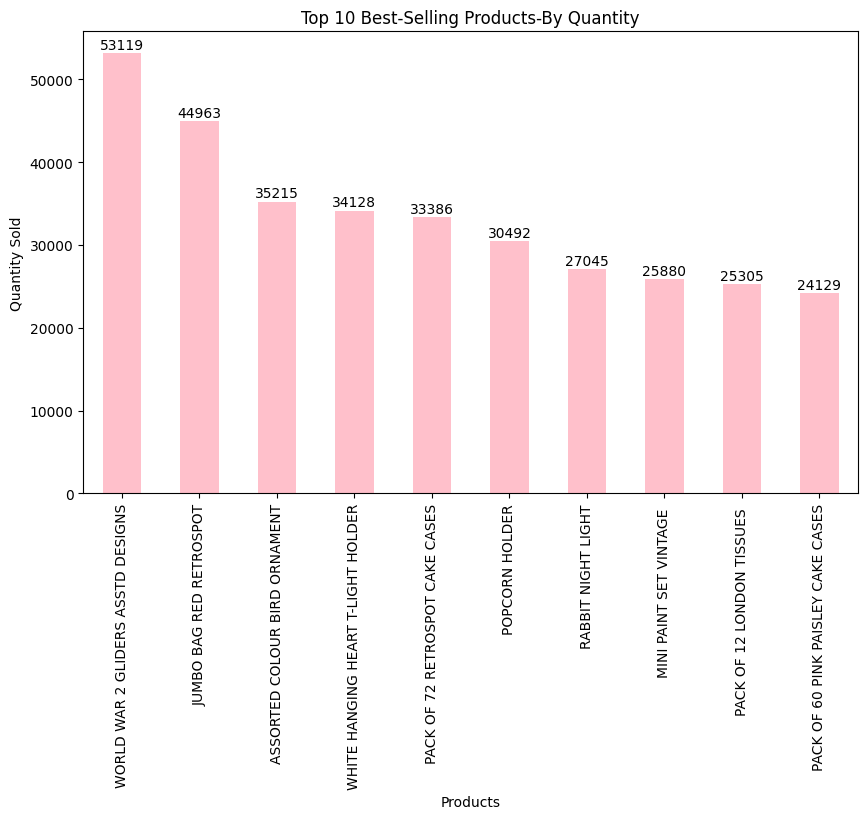

In [ ]:
# Top 10 Best Selling Products By Quantity
top_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Quantity Sold:\n", top_quantity)
ax = top_quantity.plot(kind='bar', figsize=(10, 6), color='pink', title='Top 10 Best-Selling Products-By Quantity')
plt.ylabel('Quantity Sold')
plt.xlabel('Products')
for i, quantity in enumerate(top_quantity):
    ax.text(i, quantity + 500, str(quantity), ha='center', fontsize=10)


plt.show()

Description
REGENCY CAKESTAND 3 TIER              132567.70
WHITE HANGING HEART T-LIGHT HOLDER     93767.80
JUMBO BAG RED RETROSPOT                83056.52
PARTY BUNTING                          67628.43
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56331.91
RABBIT NIGHT LIGHT                     51042.84
CHILLI LIGHTS                          45915.41
PAPER CHAIN KIT 50'S CHRISTMAS         41423.78
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalRevenue, dtype: float64


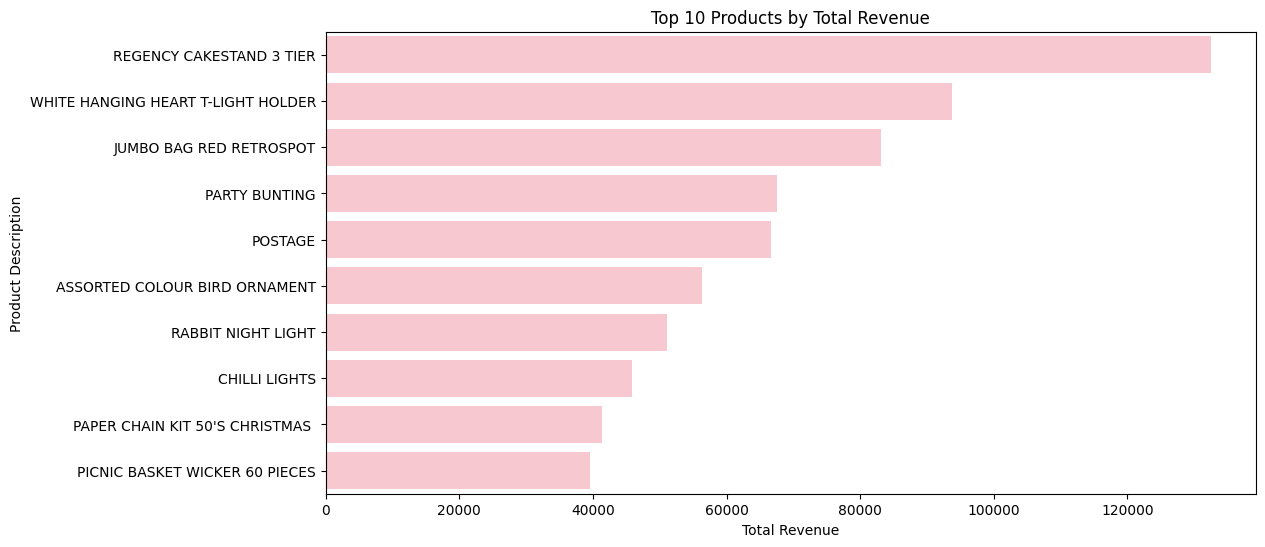

In [ ]:
# Top 10 products by total revenue
top_10_products_revenue = df.groupby('Description')['TotalRevenue'].sum().sort_values(ascending=False).head(10)
print(top_10_products_revenue)

# Plotting top 10 products by revenue
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products_revenue.values, y=top_10_products_revenue.index, color='pink')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.title('Top 10 Products by Total Revenue')
plt.show()

**Product Analysis-Lowest Revenue Generating Products**

In [ ]:
# remove rows with the following product names 'Manual', 'CRUK Commission', 'Discount'

products_to_remove = ['Manual', 'CRUK Commission', 'Discount']
df = df[~df['Description'].isin(products_to_remove)]

In [ ]:
underperformers = df.groupby('Description')['TotalRevenue'].sum().sort_values().head(10)
print("\n10 Lowest Revenue-Generating Products:\n", underperformers)


10 Lowest Revenue-Generating Products:
 Description
CHALKBOARD KITCHEN ORGANISER      -87.80
WHITE CHERRY LIGHTS               -54.00
CREAM SWEETHEART MAGAZINE RACK    -46.85
WOODEN BOX ADVENT CALENDAR        -45.70
ASSORTED TUTTI FRUTTI ROUND BOX   -39.60
PINK CHERRY LIGHTS                -27.00
BLUE PADDED SOFT MOBILE           -25.50
ANTIQUE LILY FAIRY LIGHTS         -14.85
CREAM SWEETHEART TRAYS            -12.75
TEA TIME CAKE STAND IN GIFT BOX   -10.75
Name: TotalRevenue, dtype: float64


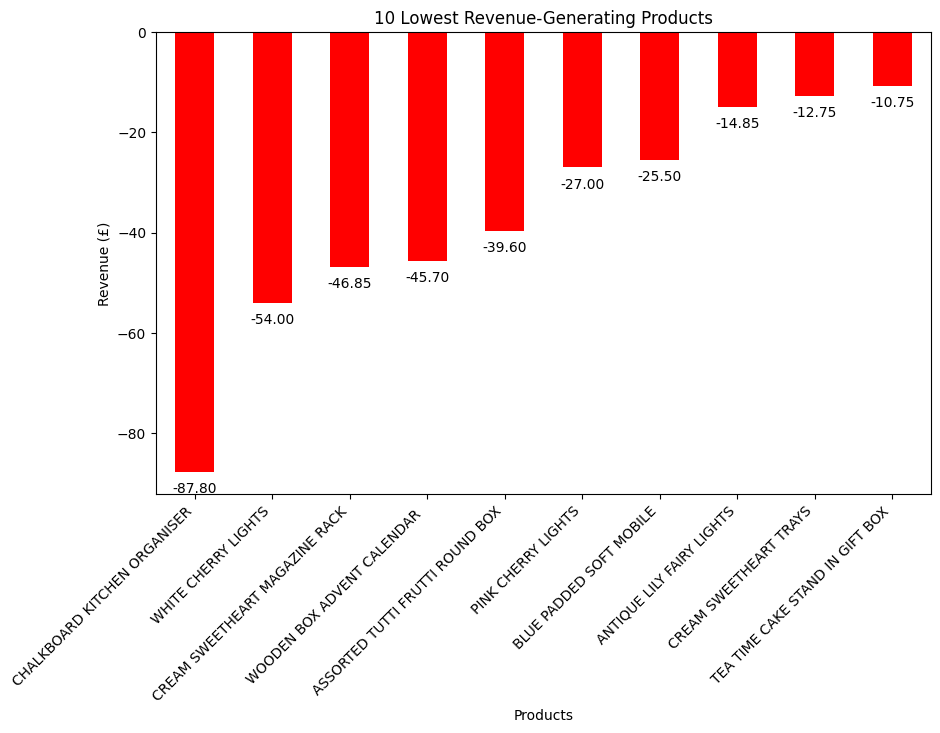

In [ ]:
# 10 Lowest Revenue-Generating Products with graph

ax = underperformers.plot(kind='bar', figsize=(10, 6), color='red', title='10 Lowest Revenue-Generating Products')

plt.ylabel('Revenue (£)')
plt.xlabel('Products')

plt.xticks(rotation=45, ha='right', fontsize=10)

for i, revenue in enumerate(underperformers):
    # Minimal offset for text placement
    offset = 2 if revenue > 0 else -2
    va = 'bottom' if revenue > 0 else 'top'
    ax.text(i, revenue + offset, f"{revenue:.2f}", ha='center', va=va, fontsize=10, color='black')

plt.show()

**RFM Analysis**

In [ ]:
#Loading Customer Dataset
df= pd.read_csv('/content/ProcessedData.csv')

In [ ]:
# Convert the 'InvoiceDate' column to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Use the latest transaction date as the cutoff date
max_date = df['InvoiceDate'].max()

# Calculate the RFM dimensions
# Recency (r): The number of days since the last transaction
df['Recency'] = (max_date - df['InvoiceDate']).dt.days

# Frequency (f): The number of unique purchases per customer
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Monetary (m): The total spend per customer
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID')['TotalSpend'].sum()

# Combine the RFM data
rfm = pd.DataFrame({
    'Recency': df.groupby('CustomerID')['Recency'].min(),
    'Frequency': frequency,
    'Monetary': monetary
})
print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
12346.0         325          2      0.00
12347.0           1          7   4310.00
12348.0          74          4   1797.24
12349.0          18          1   1757.55
12350.0         309          1    334.40


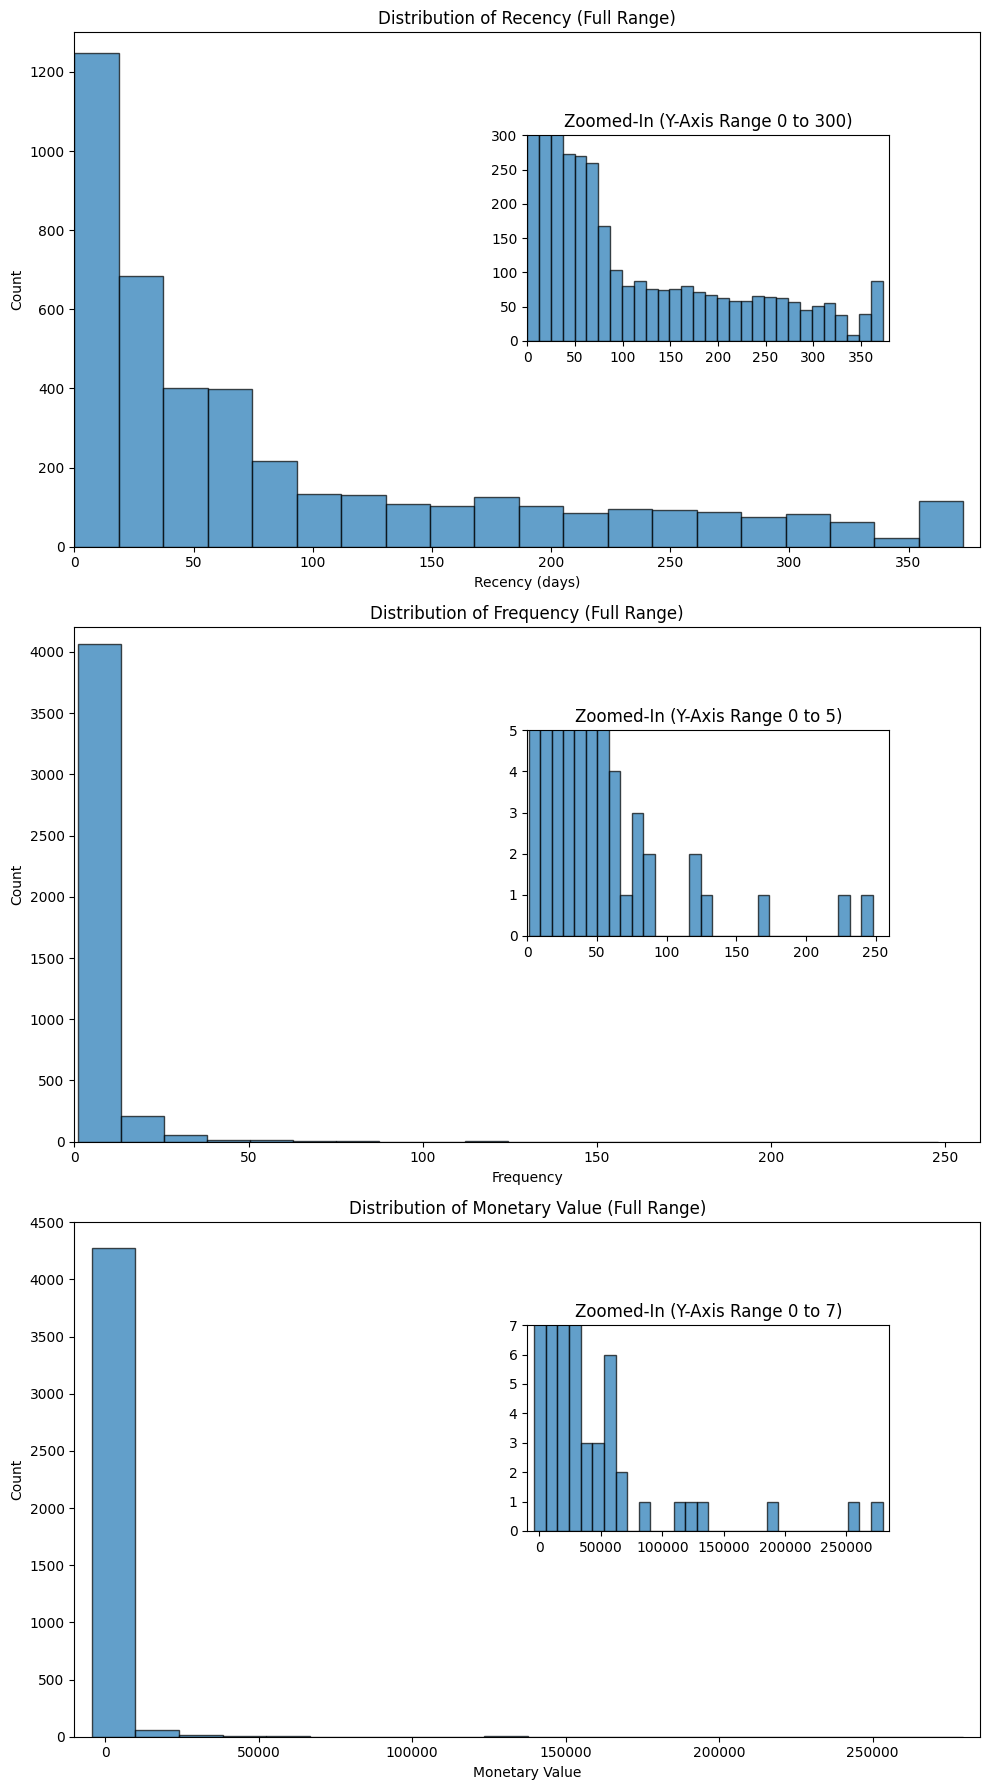

In [ ]:
# Create a figure with 1 column and 3 rows
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot for Recency
axs[0].hist(rfm['Recency'], bins=20, edgecolor='k', alpha=0.7)
axs[0].set_title('Distribution of Recency (Full Range)')
axs[0].set_xlabel('Recency (days)')
axs[0].set_ylabel('Count')
axs[0].set_xlim(0, 380)
axs[0].set_ylim(0, 1300)

# Zoomed-In inset for Recency
focus_area_recency = rfm[(rfm['Recency'] >= 0) & (rfm['Recency'] <= 380)]  # Focus on Recency from 0 to 380 days
ax_inset_recency = axs[0].inset_axes([0.5, 0.4, 0.4, 0.4])  # Position [x, y, width, height]
ax_inset_recency.hist(focus_area_recency['Recency'], bins=30, edgecolor='k', alpha=0.7)
ax_inset_recency.set_title('Zoomed-In (Y-Axis Range 0 to 300)')
ax_inset_recency.set_xlim(0, 380)
ax_inset_recency.set_ylim(0, 300)

# Plot for Frequency
axs[1].hist(rfm['Frequency'], bins=20, edgecolor='k', alpha=0.7)
axs[1].set_title('Distribution of Frequency (Full Range)')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Count')
axs[1].set_xlim(0, 260)
axs[1].set_ylim(0, 4200)

# Zoomed-In inset for Frequency
focus_area_frequency = rfm[(rfm['Frequency'] >= 0) & (rfm['Frequency'] <= 260)]  # Focus on Frequency from 0 to 260
ax_inset_frequency = axs[1].inset_axes([0.5, 0.4, 0.4, 0.4])  # Position [x, y, width, height]
ax_inset_frequency.hist(focus_area_frequency['Frequency'], bins=30, edgecolor='k', alpha=0.7)
ax_inset_frequency.set_title('Zoomed-In (Y-Axis Range 0 to 5)')
ax_inset_frequency.set_xlim(0, 260)
ax_inset_frequency.set_ylim(0, 5)

# Plot for Monetary
axs[2].hist(rfm['Monetary'], bins=20, edgecolor='k', alpha=0.7)
axs[2].set_title('Distribution of Monetary Value (Full Range)')
axs[2].set_xlabel('Monetary Value')
axs[2].set_ylabel('Count')
axs[2].set_xlim(-10000, 285000)
axs[2].set_ylim(0, 4500)

# Zoomed-In inset for Monetary
focus_area_monetary = rfm[(rfm['Monetary'] >= -10000) & (rfm['Monetary'] <= 285000)]  # Focus on Monetary from 0 to 5000
ax_inset_monetary = axs[2].inset_axes([0.5, 0.4, 0.4, 0.4])  # Position [x, y, width, height]
ax_inset_monetary.hist(focus_area_monetary['Monetary'], bins=30, edgecolor='k', alpha=0.7)
ax_inset_monetary.set_title('Zoomed-In (Y-Axis Range 0 to 7)')
ax_inset_monetary.set_xlim(-10000, 285000)
ax_inset_monetary.set_ylim(0, 7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

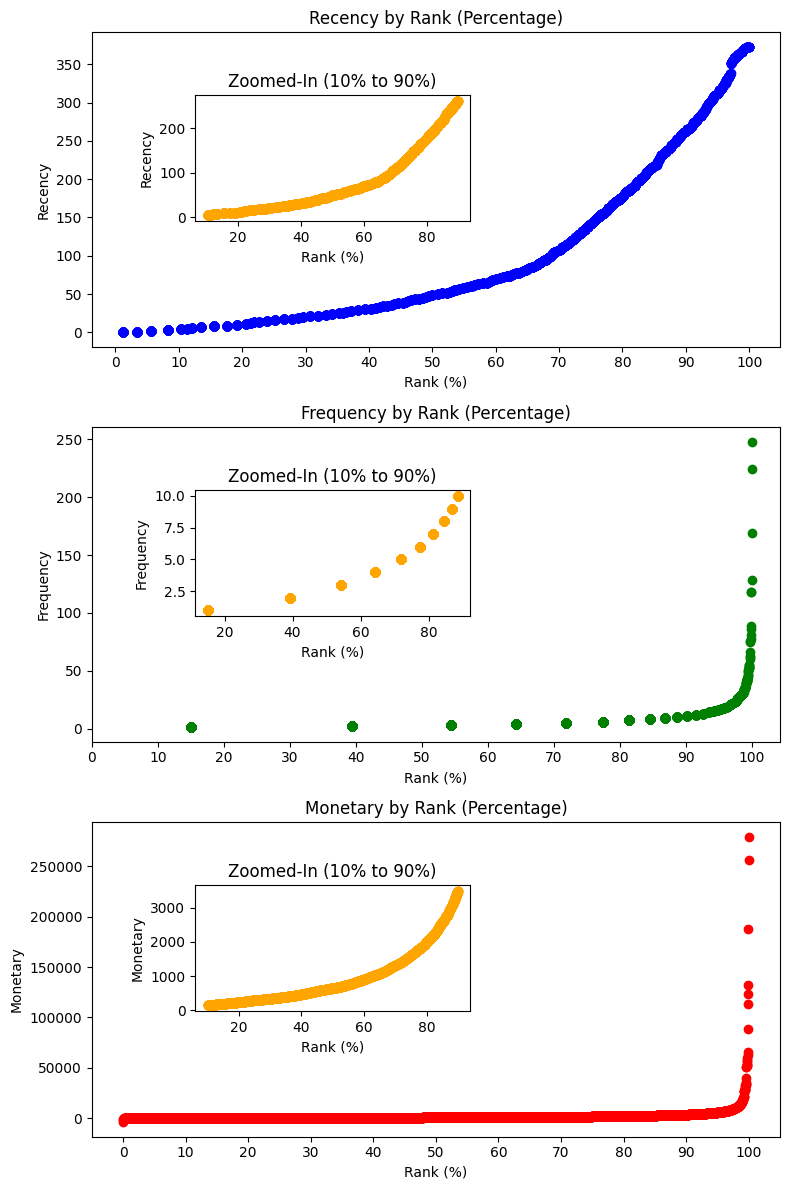

In [ ]:
# Sort the data for each column and get the rank (position) as percentage (0 to 100%)
rfm['Recency_rank'] = rfm['Recency'].rank(pct=True) * 100  # rank as percentage
rfm['Frequency_rank'] = rfm['Frequency'].rank(pct=True) * 100
rfm['Monetary_rank'] = rfm['Monetary'].rank(pct=True) * 100

# Create a figure with 3 subplots for each of Recency, Frequency, and Monetary
plt.figure(figsize=(8, 12))  # Adjust the figure size for 3 subplots

# Plot Recency with percentage rank as x-axis
plt.subplot(3, 1, 1)  # 1 row, 3 columns, first subplot
plt.scatter(rfm['Recency_rank'], rfm['Recency'], color='b')
plt.title('Recency by Rank (Percentage)')
plt.xlabel('Rank (%)')
plt.ylabel('Recency')

# Set x-axis ticks for every 10% interval
plt.xticks(np.arange(0, 110, 10))

# Add a zoomed-in inset plot for Recency (focusing on 10% to 90%)
focus_area_recency = rfm[(rfm['Recency_rank'] >= 10) & (rfm['Recency_rank'] <= 90)]  # Focus on 10% to 90%

# Create inset plot for Recency
ax_inset_recency = plt.gca().inset_axes([0.15, 0.4, 0.4, 0.4])  # Position [x, y, width, height]
ax_inset_recency.scatter(focus_area_recency['Recency_rank'], focus_area_recency['Recency'], color='orange')
ax_inset_recency.set_title('Zoomed-In (10% to 90%)')
ax_inset_recency.set_xlabel('Rank (%)')
ax_inset_recency.set_ylabel('Recency')

# Plot Frequency with percentage rank as x-axis
plt.subplot(3, 1, 2)  # 1 row, 3 columns, second subplot
plt.scatter(rfm['Frequency_rank'], rfm['Frequency'], color='g')
plt.title('Frequency by Rank (Percentage)')
plt.xlabel('Rank (%)')
plt.ylabel('Frequency')

# Set x-axis ticks for every 10% interval
plt.xticks(np.arange(0, 110, 10))

# Add a zoomed-in inset plot for Frequency (focusing on 10% to 90%)
focus_area_frequency = rfm[(rfm['Frequency_rank'] >= 10) & (rfm['Frequency_rank'] <= 90)]  # Focus on 10% to 90%

# Create inset plot for Frequency
ax_inset_frequency = plt.gca().inset_axes([0.15, 0.4, 0.4, 0.4])  # Position [x, y, width, height]
ax_inset_frequency.scatter(focus_area_frequency['Frequency_rank'], focus_area_frequency['Frequency'], color='orange')
ax_inset_frequency.set_title('Zoomed-In (10% to 90%)')
ax_inset_frequency.set_xlabel('Rank (%)')
ax_inset_frequency.set_ylabel('Frequency')

# Plot Monetary with percentage rank as x-axis
plt.subplot(3, 1, 3)  # 1 row, 3 columns, third subplot
plt.scatter(rfm['Monetary_rank'], rfm['Monetary'], color='r')
plt.title('Monetary by Rank (Percentage)')
plt.xlabel('Rank (%)')
plt.ylabel('Monetary')

# Set x-axis ticks for every 10% interval
plt.xticks(np.arange(0, 110, 10))

# Add a zoomed-in inset plot for Monetary (focusing on 10% to 90%)
focus_area_monetary = rfm[(rfm['Monetary_rank'] >= 10) & (rfm['Monetary_rank'] <= 90)]  # Focus on 10% to 90%

# Create inset plot for Monetary
ax_inset_monetary = plt.gca().inset_axes([0.15, 0.4, 0.4, 0.4])  # Position [x, y, width, height]
ax_inset_monetary.scatter(focus_area_monetary['Monetary_rank'], focus_area_monetary['Monetary'], color='orange')
ax_inset_monetary.set_title('Zoomed-In (10% to 90%)')
ax_inset_monetary.set_xlabel('Rank (%)')
ax_inset_monetary.set_ylabel('Monetary')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
print(rfm.head())

            Recency  Frequency  Monetary  Recency_rank  Frequency_rank  \
CustomerID                                                               
12346.0         325          2      0.00     96.203111       39.387008   
12347.0           1          7   4310.00      3.465233       81.427264   
12348.0          74          4   1797.24     62.294145       64.249771   
12349.0          18          1   1757.55     27.916285       15.027447   
12350.0         309          1    334.40     94.510522       15.027447   

            Monetary_rank  
CustomerID                 
12346.0          1.063586  
12347.0         92.726441  
12348.0         77.721866  
12349.0         77.127173  
12350.0         29.940531  


In [ ]:
rfm.drop(columns=['Recency_rank', 'Frequency_rank', 'Monetary_rank'], inplace=True)

rfm['R_Score'] = pd.qcut(rfm['Recency'], 3, labels=[3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 3, labels=[1, 2, 3])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 3, labels=[1, 2, 3])

rfm.drop(columns=['Recency', 'Frequency', 'Monetary'], inplace=True)

rfm['RFM_Score'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)

print(rfm.head())

           R_Score F_Score M_Score RFM_Score
CustomerID                                  
12346.0          1       1       1       111
12347.0          3       3       3       333
12348.0          2       2       3       223
12349.0          3       1       3       313
12350.0          1       1       1       111


In [ ]:
# Define a function for classification
def classify_rfm(score):
    segments = []

    # Check conditions for each category and append to the list
    if score[:2] == '33':
        segments.append('Loyal')
    if score[2] == '3':  # Last character is '3'
        segments.append('High-Value')
    if score[:2] == '31':  # First two characters are '31'
        segments.append('New')
    if score[0] == '1':  # First character is '1'
        segments.append('Lost')
    if score[0] == '2':  # First character is '2'
        segments.append('Losing')
    if score[1] == '3':  # Middle character is '3'
        segments.append('High-Frequency')
    if score[1] == '1':
        segments.append('Low-Frequency')
    if score[:2] == '11':  # First two characters are '11'
        segments.append('Accidental')
    if score[2] == '1':  # Last character is '1'
        segments.append('Low-Spending')
    if score == '322':
        segments.append('Ordinary')
    # Return the segments as a comma-separated string
    return ', '.join(segments) if segments else 'Others'

# Apply classification and create a new 'Segment' column
rfm['Segment'] = rfm['RFM_Score'].apply(classify_rfm)

# Filter the rows where the segment is 'Others'
others = rfm[rfm['Segment'] == 'Others']

# Print the 'RFM_Score' of the 'Others' segment
print("RFM Scores classified as 'Others':")
print(others['RFM_Score'].values)
rfm['Segment'] = rfm['RFM_Score'].apply(classify_rfm)

rfm['Segment'] = rfm['Segment'].apply(lambda x: x.replace('Lost', '') if 'Accidental' in x and 'Lost' in x else x)
rfm['Segment'] = rfm['Segment'].apply(lambda x: x.replace('High-Frequency', '') if 'High-Frequency' in x and 'Loyal' in x else x)
rfm['Segment'] = rfm['Segment'].apply(lambda x: x.replace('Low-Frequency', '') if 'Accidental' in x and 'Low-Frequency' in x else x)
rfm['Segment'] = rfm['Segment'].apply(lambda x: x.replace('Low-Frequency', '') if 'New' in x and 'Low-Frequency' in x else x)
rfm['Segment'] = rfm['Segment'].apply(lambda x: ','.join([i.strip() for i in x.split(',') if i.strip() != '']))

print(rfm.head())


RFM Scores classified as 'Others':
[]
           R_Score F_Score M_Score RFM_Score                  Segment
CustomerID                                                           
12346.0          1       1       1       111  Accidental,Low-Spending
12347.0          3       3       3       333         Loyal,High-Value
12348.0          2       2       3       223        High-Value,Losing
12349.0          3       1       3       313           High-Value,New
12350.0          1       1       1       111  Accidental,Low-Spending


In [ ]:
rfm.drop(columns=['R_Score', 'F_Score', 'M_Score','RFM_Score'], inplace=True)
print(rfm.head(10))

                                     Segment
CustomerID                                  
12346.0              Accidental,Low-Spending
12347.0                     Loyal,High-Value
12348.0                    High-Value,Losing
12349.0                       High-Value,New
12350.0              Accidental,Low-Spending
12352.0     High-Value,Losing,High-Frequency
12353.0              Accidental,Low-Spending
12354.0                           Accidental
12355.0                           Accidental
12356.0                           High-Value


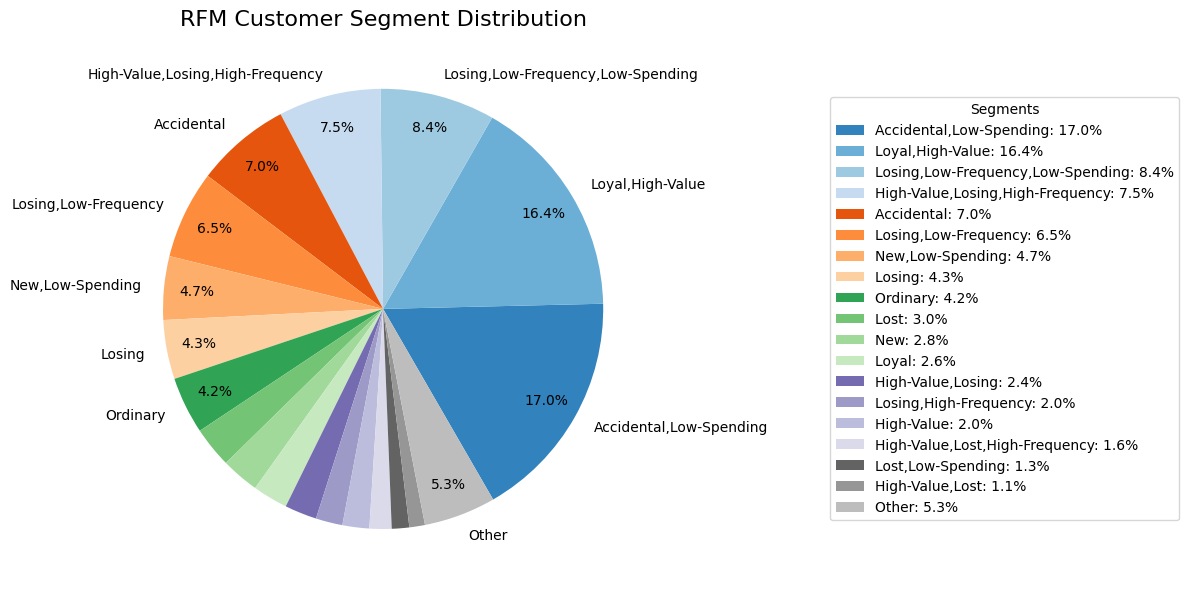

In [ ]:
# Count each segment for plotting
category_counts = rfm['Segment'].value_counts()

# Define a list of unique colors for each segment
colors = plt.cm.tab20c(range(len(category_counts)))

# Calculate the percentage of each segment
percentages = category_counts.values / category_counts.sum() * 100

# Create new lists for labels, counts, and percentages
threshold_other = 1.1  # Categories to be merged into "Other"
threshold_hide = 4     # Categories with less than 4% should hide names and percentages
labels = []
new_counts = []
new_percentages = []

# Iterate through each segment, accumulating small ones into "Other"
for label, count, percent in zip(category_counts.index, category_counts.values, percentages):
    if percent <= threshold_other:
        # Add small percentages to "Other"
        if 'Other' in labels:
            new_counts[labels.index('Other')] += count
            new_percentages[labels.index('Other')] += percent
        else:
            labels.append('Other')
            new_counts.append(count)
            new_percentages.append(percent)
    else:
        labels.append(label)
        new_counts.append(count)
        new_percentages.append(percent)

# Filter labels and autopct based on the new thresholds (hiding labels for small percentages)
filtered_labels = [label if percent >= threshold_hide else '' for label, percent in zip(labels, new_percentages)]
autopct = lambda p: f'{p:.1f}%' if p >= threshold_hide else ''

# Create the pie chart
plt.figure(figsize=(13, 13))
plt.pie(
    new_counts,
    labels=filtered_labels,  # Only show labels for larger segments
    autopct=autopct,  # Only show percentage for larger segments
    startangle=300,
    colors=colors,
    pctdistance=0.85
)

# Add a legend with all categories and percentages
legend_labels = [f'{label}: {percent:.1f}%' for label, percent in zip(labels, new_percentages)]
plt.legend(
    legend_labels,
    title="Segments",
    loc="center left",
    fontsize=10,
    bbox_to_anchor=(1.3, 0.5)
)

# Title and aesthetic adjustments
plt.title('RFM Customer Segment Distribution', fontsize=16)

# Display the pie chart
plt.tight_layout()
plt.show()